In [1]:
import glob
import os
import time
from scipy.io import loadmat
import cobra
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f_path = "C:/Users/NOE/Desktop/Mostres TFG Obtingudes/BRCA"
file_paths = glob.glob(f_path + "/*.mat")


models = []
solutions = []
for file_path in file_paths:
    model = cobra.io.load_matlab_model(file_path)
    model.name = os.path.splitext(os.path.basename(file_path))[0].replace("_", "-")
    solution = model.optimize()
    
    print(f'Successfully created dataframe for {model.name} with shape {models}')
    models.append(model)
    solutions.append(solution)

No defined compartments in model ContextModel_CancerBRCA. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


Successfully created dataframe for CancerBRCAModel-BRCA-C-TCGA-C8-A27B-01A-11R-A169-07 with shape []


No defined compartments in model ContextModel_CancerBRCA. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


Successfully created dataframe for CancerBRCAModel-BRCA-C-TCGA-E2-A14R-01A-11R-A115-07 with shape [<Model ContextModel_CancerBRCA at 0x14160cd4690>]


No defined compartments in model ContextModel_CancerBRCA. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


Successfully created dataframe for CancerBRCAModel-BRCA-C-TCGA-LD-A7W6-01A-81R-A352-07 with shape [<Model ContextModel_CancerBRCA at 0x14160cd4690>, <Model ContextModel_CancerBRCA at 0x141650fd410>]


No defined compartments in model ContextModel_ControlBRCA. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


Successfully created dataframe for ControlBRCAModel-BRCA-H-TCGA-A7-A0DB-11A-33R-A089-07-1 with shape [<Model ContextModel_CancerBRCA at 0x14160cd4690>, <Model ContextModel_CancerBRCA at 0x141650fd410>, <Model ContextModel_CancerBRCA at 0x14166a56f90>]


No defined compartments in model ContextModel_ControlBRCA. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


Successfully created dataframe for ControlBRCAModel-BRCA-H-TCGA-A7-A13E-11A-61R-A12P-07 with shape [<Model ContextModel_CancerBRCA at 0x14160cd4690>, <Model ContextModel_CancerBRCA at 0x141650fd410>, <Model ContextModel_CancerBRCA at 0x14166a56f90>, <Model ContextModel_ControlBRCA at 0x14168ebe750>]


No defined compartments in model ContextModel_ControlBRCA. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


Successfully created dataframe for ControlBRCAModel-BRCA-H-TCGA-BH-A1FR-11B-42R-A13Q-07 with shape [<Model ContextModel_CancerBRCA at 0x14160cd4690>, <Model ContextModel_CancerBRCA at 0x141650fd410>, <Model ContextModel_CancerBRCA at 0x14166a56f90>, <Model ContextModel_ControlBRCA at 0x14168ebe750>, <Model ContextModel_ControlBRCA at 0x1416c441b10>]


In [3]:
fluxes_df = pd.DataFrame(index = [model.id for model in models])
fluxes_df

""
CancerBRCAModel-BRCA-C-TCGA-C8-A27B-01A-11R-A169-07
CancerBRCAModel-BRCA-C-TCGA-E2-A14R-01A-11R-A115-07
CancerBRCAModel-BRCA-C-TCGA-LD-A7W6-01A-81R-A352-07
ControlBRCAModel-BRCA-H-TCGA-A7-A0DB-11A-33R-A089-07-1
ControlBRCAModel-BRCA-H-TCGA-A7-A13E-11A-61R-A12P-07
ControlBRCAModel-BRCA-H-TCGA-BH-A1FR-11B-42R-A13Q-07


In [4]:
fluxes_df = pd.DataFrame(index = [model.id for model in models])

for i, solution in enumerate(solutions, start = 0):
    fluxes = solution.fluxes
    
    for reaction, flux in fluxes.items():
        if reaction not in fluxes_df.columns:
            fluxes_df[reaction] = 0.0
        
        fluxes_df.loc[fluxes_df.index[i], reaction] = flux
        fluxes_df = fluxes_df.copy()

fluxes_df.head()

,10FTHF7GLUtl,10FTHFtl,13DAMPPOX,2HBO,2HBt2,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,...,3HSMVitr,6CSMVitr,6HMSMVitr,6HSMVitr,LVSTitr,PTVSTLACitr,RSVLACitr,SMVitr,RSVitr,PTVSTitr
CancerBRCAModel-BRCA-C-TCGA-C8-A27B-01A-11R-A169-07,0.0,0.0,0.0,-228.826242,-228.826242,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CancerBRCAModel-BRCA-C-TCGA-E2-A14R-01A-11R-A115-07,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CancerBRCAModel-BRCA-C-TCGA-LD-A7W6-01A-81R-A352-07,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ControlBRCAModel-BRCA-H-TCGA-A7-A0DB-11A-33R-A089-07-1,0.0,0.0,0.0,-612.684618,-493.118962,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ControlBRCAModel-BRCA-H-TCGA-A7-A13E-11A-61R-A12P-07,0.0,0.0,0.0,-975.423086,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
def flux_transformer(v):

    '''
    This function transforms fluxes into log2 scale with three additions:
    - zero values are kept.
    - values between 0 and 2 are adjusted to fit below one.
    - negative fluxes are considered. 
    '''

    def adjusted(v):
        new = (np.log2(v + 0.125) + 3) / 4
        return np.min([new, 1])

    if v == 0:
        vprime = 0
    elif v > 0:
        if v < 2:
            vprime = adjusted(v)
        else:
            vprime = np.log2(v)
    elif v < 0:
        v = np.abs(v)
        if v < 2:
            vprime = -adjusted(v)
        else:
            vprime = -np.log2(v)
    else:
        raise ValueError('found value not considered')

    return vprime

In [6]:
t_fluxes_df = fluxes_df.applymap(flux_transformer)
t_fluxes_df

,10FTHF7GLUtl,10FTHFtl,13DAMPPOX,2HBO,2HBt2,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,...,3HSMVitr,6CSMVitr,6HMSMVitr,6HSMVitr,LVSTitr,PTVSTLACitr,RSVLACitr,SMVitr,RSVitr,PTVSTitr
CancerBRCAModel-BRCA-C-TCGA-C8-A27B-01A-11R-A169-07,0,0,0,-7.838109,-7.838109,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CancerBRCAModel-BRCA-C-TCGA-E2-A14R-01A-11R-A115-07,0,0,0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CancerBRCAModel-BRCA-C-TCGA-LD-A7W6-01A-81R-A352-07,0,0,0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ControlBRCAModel-BRCA-H-TCGA-A7-A0DB-11A-33R-A089-07-1,0,0,0,-9.259001,-8.945792,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ControlBRCAModel-BRCA-H-TCGA-A7-A13E-11A-61R-A12P-07,0,0,0,-9.929884,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ControlBRCAModel-BRCA-H-TCGA-BH-A1FR-11B-42R-A13Q-07,0,0,0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
from scipy import stats
from statsmodels.stats import multitest
import seaborn as sns

In [10]:
cancer_samples=t_fluxes_df.head(3)
control_samples=t_fluxes_df.tail(3)
control_samples

,10FTHF7GLUtl,10FTHFtl,13DAMPPOX,2HBO,2HBt2,2OXOADOXm,2OXOADPTm,34DHOXPEGOX,34DHOXPEGt,34DHPHAMT,...,3HSMVitr,6CSMVitr,6HMSMVitr,6HSMVitr,LVSTitr,PTVSTLACitr,RSVLACitr,SMVitr,RSVitr,PTVSTitr
ControlBRCAModel-BRCA-H-TCGA-A7-A0DB-11A-33R-A089-07-1,0,0,0,-9.259001,-8.945792,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ControlBRCAModel-BRCA-H-TCGA-A7-A13E-11A-61R-A12P-07,0,0,0,-9.929884,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ControlBRCAModel-BRCA-H-TCGA-BH-A1FR-11B-42R-A13Q-07,0,0,0,0.000000,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
t_statistic, p_values = stats.ttest_ind(cancer_samples, control_samples, axis = 0, nan_policy = 'omit')
fold_change = np.log2(np.mean(cancer_samples, axis = 0)) - np.log2(np.mean(control_samples, axis = 0))
fold_change[np.isnan(fold_change)] = 0
p_values[np.isnan(p_values)] = 1.0  
reject, q_values = multitest.fdrcorrection(p_values)

t_results = pd.DataFrame({
    'reaction': t_fluxes_df.columns,
    'p_value': p_values,
    'q_value': q_values,
    'log_fc': fold_change
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['log_fc'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['log_fc'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_fluxes_sign = t_fluxes_df[t_results[t_results['sign'] != 'NORMAL']['reaction'].values]
t_fluxes_sign.head()

C:\Users\NOE\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:551: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NOE\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,EX_10fthf[e],GGH_10FTHF5GLUe,GGH_10FTHF6GLUe,GGH_10FTHF7GLUe,GLUPROASCT1,VALTA,2HIVc,2HIVte,EX_2hiv[e],PVSOATPtu
CancerBRCAModel-BRCA-C-TCGA-C8-A27B-01A-11R-A169-07,7.016972,7.016972,7.016972,7.016972,9.601935,0.000000,0.000000,0.000000,0.000000,0.000000
CancerBRCAModel-BRCA-C-TCGA-E2-A14R-01A-11R-A115-07,7.380822,7.380822,7.380822,7.380822,9.965784,0.000000,0.000000,0.000000,0.000000,0.000000
CancerBRCAModel-BRCA-C-TCGA-LD-A7W6-01A-81R-A352-07,7.087339,7.087339,7.087339,7.087339,9.845794,0.000000,0.000000,0.000000,0.000000,0.000000
ControlBRCAModel-BRCA-H-TCGA-A7-A0DB-11A-33R-A089-07-1,0.000000,0.000000,0.000000,0.000000,0.000000,8.957103,8.957103,8.957103,8.957103,8.818102
ControlBRCAModel-BRCA-H-TCGA-A7-A13E-11A-61R-A12P-07,0.000000,0.000000,0.000000,0.000000,0.000000,9.882653,9.882653,9.882653,9.882653,8.553887


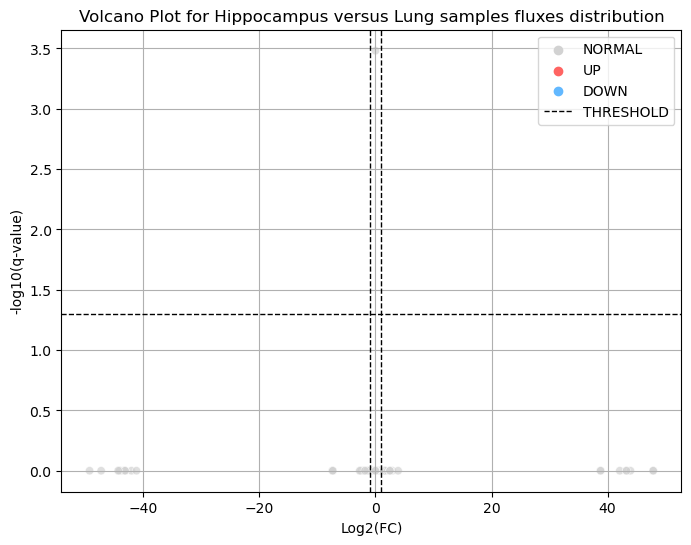

In [13]:
colors2 = {"NORMAL":"#D2D2D2", "UP":"#FF6462", "DOWN":"#62B8FF"}
plt.figure(figsize = (8, 6))

sns.scatterplot(x = t_results['log_fc'], y = -np.log10(t_results['q_value']), hue = t_results['sign'], palette = colors2, alpha = 0.7)
plt.axhline(-np.log10(0.05), color = 'k', linestyle = '--', linewidth = 1, label = 'THRESHOLD')
plt.axvline(1, color = 'k', linestyle = '--', linewidth = 1)
plt.axvline(-1, color = 'k', linestyle = '--', linewidth = 1)

plt.xlabel('Log2(FC)')
plt.ylabel('-log10(q-value)')
plt.title('Volcano Plot for Hippocampus versus Lung samples fluxes distribution')
plt.legend()
plt.grid(True)
plt.show()